In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from plot_utils import *
import csv

model1 = "gpt-4o"
model2 = "qwen2.5-32b-instruct"
file_name1 = f"results/{model1}_oed_direct_eig_by_obs_wide.csv"
file_name2 = f"results/{model2}_oed_direct_eig_by_obs_wide.csv"

print(file_name1)
print(file_name2)


results/gpt-4o_oed_direct_eig_by_obs_wide.csv
results/qwen2.5-32b-instruct_oed_direct_eig_by_obs_wide.csv


In [2]:
# read the csv file with csv.reader
with open(file_name1, 'r') as file:
    reader = csv.reader(file)
    data1 = list(reader)

with open(file_name2, 'r') as file:
    reader = csv.reader(file)
    data2 = list(reader)

print(data1[0])
print(data2[0])


['Environment_', 'Prior_', 'CI_95_0', 'CI_95_1', 'CI_95_3', 'CI_95_5', 'CI_95_7', 'CI_95_10', 'Mean_Value_0', 'Mean_Value_1', 'Mean_Value_3', 'Mean_Value_5', 'Mean_Value_7', 'Mean_Value_10']
['Environment_', 'Prior_', 'CI_95_0', 'CI_95_1', 'CI_95_3', 'CI_95_5', 'CI_95_7', 'CI_95_10', 'Mean_Value_0', 'Mean_Value_1', 'Mean_Value_3', 'Mean_Value_5', 'Mean_Value_7', 'Mean_Value_10']


In [3]:
# remove the header row
data1 = data1[1:]
data2 = data2[1:]


In [4]:
# only keep where col 2 is True
prior_data1 = [d for d in data1 if d[1] == "True"]
no_prior_data1 = [d for d in data1 if d[1] == "False"]
prior_data2 = [d for d in data2 if d[1] == "True"]
no_prior_data2 = [d for d in data2 if d[1] == "False"]

In [9]:
environment = "hyperbolic_temporal_discount"
env_prior_data1 = [d for d in prior_data1 if d[0] == environment]
env_prior_data1 = [d for d in prior_data1 if d[0] == environment]
env_no_prior_data1 = [d for d in no_prior_data1 if d[0] == environment]
env_prior_data2 = [d for d in prior_data2 if d[0] == environment]
env_no_prior_data2 = [d for d in no_prior_data2 if d[0] == environment]


In [10]:
errs1 = [[float(d[8+i]) for i in range(6)] for d in env_prior_data1]
stderrs1 = [[float(d[2+i]) /1.96 for i in range(6)] for d in env_prior_data1]
errs_no_prior1 = [[float(d[8+i]) for i in range(6)] for d in env_no_prior_data1]
stderrs_no_prior1 = [[float(d[2+i]) /1.96 for i in range(6)] for d in env_no_prior_data1]

errs2 = [[float(d[8+i]) for i in range(6)] for d in env_prior_data2]
stderrs2 = [[float(d[2+i]) /1.96 for i in range(6)] for d in env_prior_data2]
errs_no_prior2 = [[float(d[8+i]) for i in range(6)] for d in env_no_prior_data2]
stderrs_no_prior2 = [[float(d[2+i]) /1.96 for i in range(6)] for d in env_no_prior_data2]



In [11]:
means1 = errs1[0]
ci1 = stderrs1[0]
if len(errs2) > 0:
    means2 = errs2[0]
    ci2 = stderrs2[0]
    x_labels = [model1, model2]
else:
    means2 = None
    ci2 = None
    x_labels = [model1]
print(means1)
print(ci1)
print(means2)
print(ci2)


[0.015096742884009745, 0.019269392051200308, 0.02615861762840087, 0.07138515132792153, 0.20428818598052728, 0.08284915115468791]
[0.004107856280938786, 0.006570746457560601, 0.0068568631235684544, 0.010888273862388905, 0.017189487245399985, 0.008961378915266013]
[0.12947883368660631, 0.028421543503877655, 0.08479146526961497, 0.11064451181208015, 0.09285924024584241, 0.06900955300217353]
[0.0056346232946086405, 0.003974073085299844, 0.004619956564508664, 0.00946920171954176, 0.005667702637422455, 0.010528694013812798]


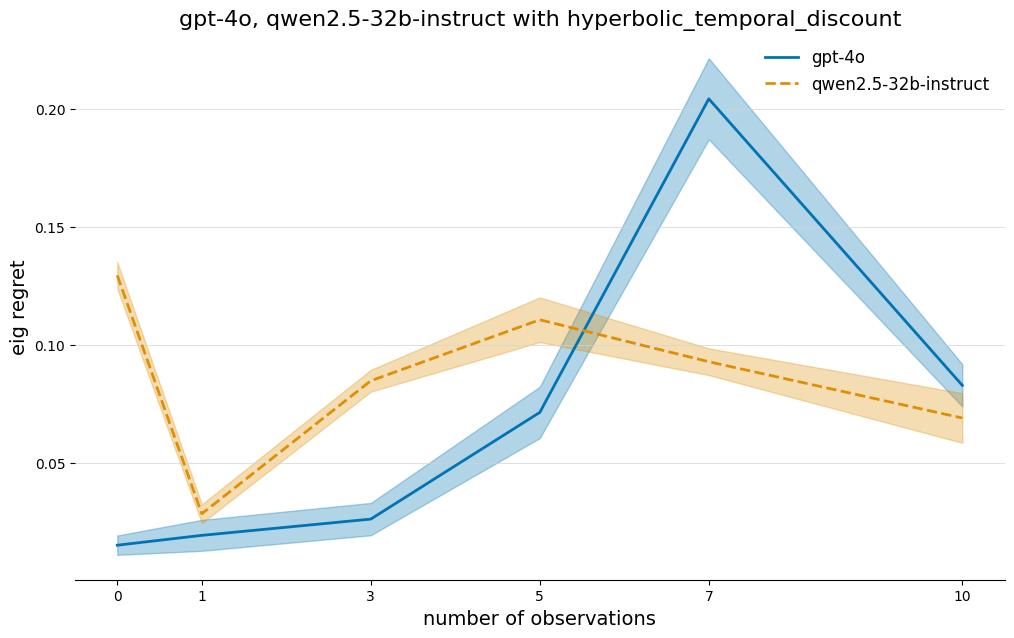

In [12]:
plot_lines([0, 1, 3, 5, 7, 10], means1, ci1, means2, ci2, model1, model2, "number of observations", "eig regret", f"{model1}, {model2} with {environment}", f"eig_{model1}_{model2}_{environment}.png")